<a href="https://colab.research.google.com/github/himanshu230998/Project-CP102/blob/main/Neural%20network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#All import
import tensorflow as tf
import warnings
warnings.simplefilter("ignore")
import numpy as np
import torch
import torch.nn as nn
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split
import unicodedata
import re
import numpy as np
import os
import io
import time
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [6]:
with open('/content/drive/MyDrive/dataset/drive/timeseries.txt', "r") as f:
  a = []
  for line in f.readlines():
    arr=line.split(";")
    p = arr[4].split(",")
    a.append(float(p[-1][2:-3]))

  f.close()
print(a)
a = a[:41]*20
a = a[:-1]
#print((a))

[0.0, 0.24531, 0.98125, 2.2078, 3.925, 6.0283, 8.3264, 10.923, 14.538, 18.708, 23.195, 28.262, 33.842, 39.906, 46.465, 53.441, 60.932, 68.931, 77.4, 86.708, 96.44, 106.49, 116.99, 127.95, 139.36, 151.25, 163.61, 176.46, 189.81, 203.64, 217.95, 232.74, 247.99, 263.73, 279.95, 296.66, 313.85, 331.53, 349.69, 368.33, 387.46, 0.0, 0.24531, 0.98125, 0.98125, 3.925, 5.7632, 7.5482, 9.4441, 13.002, 17.07, 21.75, 26.851, 32.45, 38.429, 44.873, 51.807, 59.227, 67.241, 75.797, 84.906, 94.646, 104.5, 115.07, 115.07, 137.32, 149.23, 161.63, 174.42, 187.67, 201.33, 215.45, 230.08, 245.19, 260.76, 276.81, 293.33, 310.33, 327.81, 345.76, 364.13, 383.08, 0.0, 0.24531, 0.98125, 2.2078, 3.925, 5.2518, 6.5619, 7.7128, 11.06, 15.213, 19.722, 24.539, 29.938, 36.107, 42.633, 49.609, 57.266, 65.218, 73.409, 82.427, 91.797, 101.91, 113.02, 124.49, 135.8, 147.82, 159.99, 172.62, 185.71, 199.26, 213.29, 227.79, 227.79, 258.18, 258.18, 290.46, 307.3, 324.58, 342.4, 342.4, 379.15, 379.15, 0.24531, 0.98125, 0.9812

In [7]:
input=[]
output=[]
with open('/content/drive/MyDrive/dataset/drive/all_data.txt', "r") as f:
    for line in f.readlines():
        arr=line.split(";")
        print(len(arr))
        for i in range(len(arr)-1):
            p=arr[i].split(",")
            #print(p)
            if(p==[' ']):
                break
            if(p=="\n"):
              break
            p=[float(p[0]),float(p[1]),float(p[2]),float(a[i])]
            print(p)
            input.append(p[0:2])
            output.append(p[2:4])

820
[0.05, 0.0, 0.0, 0.0]
[0.05, 10.0, -2.0004, 0.24531]
[0.05, 20.0, -4.0008, 0.98125]
[0.05, 30.0, -6.0011, 2.2078]
[0.05, 40.0, -8.0015, 3.925]
[0.05, 50.0, -9.9985, 6.0283]
[0.05, 60.0, -11.965, 8.3264]
[0.05, 70.0, -13.893, 10.923]
[0.05, 80.0, -15.839, 14.538]
[0.05, 90.0, -17.82, 18.708]
[0.05, 100.0, -19.769, 23.195]
[0.05, 110.0, -21.745, 28.262]
[0.05, 120.0, -23.774, 33.842]
[0.05, 130.0, -25.755, 39.906]
[0.05, 140.0, -27.753, 46.465]
[0.05, 150.0, -29.729, 53.441]
[0.05, 160.0, -31.72, 60.932]
[0.05, 170.0, -33.665, 68.931]
[0.05, 180.0, -35.614, 77.4]
[0.05, 190.0, -37.769, 86.708]
[0.05, 200.0, -39.706, 96.44]
[0.05, 210.0, -41.717, 106.49]
[0.05, 220.0, -43.762, 116.99]
[0.05, 230.0, -45.81, 127.95]
[0.05, 240.0, -47.742, 139.36]
[0.05, 250.0, -49.729, 151.25]
[0.05, 260.0, -51.729, 163.61]
[0.05, 270.0, -53.67, 176.46]
[0.05, 280.0, -55.618, 189.81]
[0.05, 290.0, -57.834, 203.64]
[0.05, 300.0, -59.804, 217.95]
[0.05, 310.0, -61.672, 232.74]
[0.05, 320.0, -63.523, 247.9

In [8]:
input_train, input_test, target_train, target_test = train_test_split(input, output, test_size=0.2)

In [9]:
input_train

[[0.45, 250.0],
 [0.35000000000000003, 170.0],
 [1.0, 260.0],
 [0.9500000000000001, 60.0],
 [0.75, 100.0],
 [0.4, 40.0],
 [0.7000000000000001, 90.0],
 [0.4, 60.0],
 [0.5, 370.0],
 [0.9, 100.0],
 [0.35000000000000003, 0.0],
 [0.15, 100.0],
 [0.75, 340.0],
 [0.3, 40.0],
 [0.25, 390.0],
 [0.6, 320.0],
 [0.2, 290.0],
 [0.9500000000000001, 80.0],
 [0.45, 200.0],
 [0.85, 20.0],
 [0.1, 170.0],
 [1.0, 240.0],
 [0.6, 130.0],
 [0.8, 40.0],
 [0.9, 320.0],
 [0.1, 70.0],
 [0.05, 190.0],
 [0.2, 310.0],
 [0.85, 10.0],
 [0.9500000000000001, 400.0],
 [0.1, 100.0],
 [0.8, 340.0],
 [0.9, 300.0],
 [0.25, 370.0],
 [0.6, 310.0],
 [0.1, 150.0],
 [0.8, 220.0],
 [0.1, 330.0],
 [1.0, 320.0],
 [0.65, 390.0],
 [0.2, 360.0],
 [0.55, 10.0],
 [0.4, 230.0],
 [0.9500000000000001, 320.0],
 [0.9500000000000001, 30.0],
 [0.45, 140.0],
 [1.0, 80.0],
 [0.25, 310.0],
 [0.4, 170.0],
 [0.1, 250.0],
 [0.55, 320.0],
 [0.7000000000000001, 370.0],
 [0.1, 10.0],
 [0.5, 60.0],
 [0.9500000000000001, 330.0],
 [0.2, 240.0],
 [0.25, 90

In [10]:
scaler_inp = MinMaxScaler(feature_range=(-1,1))
scaler_inp = scaler_inp.fit(input_train)
scaled_inp_train = scaler_inp.transform(input_train)
#print(scaled_inp_train)

scaler_out = MinMaxScaler(feature_range=(-1,1))
scaler_out = scaler_out.fit(target_train)
scaled_out_train = scaler_out.transform(target_train)

scaler_test = MinMaxScaler(feature_range=(-1,1))
scaler_test = scaler_test.fit(input_test)
scaled_test_train = scaler_test.transform(input_test)
#print(scaled_out_train)

In [11]:
scaled_test_train[0]

array([0.68421053, 0.1       ])

In [12]:
input_train_vel=[]
input_train_thickness=[]
for i in range(len(input_train)):
    input_train_vel.append([input_train[i][1]])
    input_train_thickness.append([input_train[i][0]])

target_train_ke=[]
target_train_dop=[]
for i in range(len(target_train)):
    target_train_ke.append([target_train[i][1]])
    target_train_dop.append([target_train[i][0]])

input_test_vel=[]
input_test_thickness=[]
for i in range(len(input_test)):
    input_test_vel.append([input_test[i][1]])
    input_test_thickness.append([input_test[i][0]])

target_test_ke=[]
target_test_dop=[]
for i in range(len(target_test)):
    target_test_ke.append([target_test[i][1]])
    target_test_dop.append([target_test[i][0]])


#print(input_train_vel)

scaler_vel = MinMaxScaler(feature_range=(-1,1))
scaler_vel = scaler_vel.fit(input_train_vel)
scaled_vel_train = scaler_vel.transform(input_train_vel)

scaler_thick = MinMaxScaler(feature_range=(-1,1))
scaler_thick = scaler_thick.fit(input_train_thickness)
scaled_thick_train = scaler_thick.transform(input_train_thickness)

scaler_ke = MinMaxScaler(feature_range=(-1,1))
scaler_ke = scaler_ke.fit(target_train_ke)
scaled_ke_train = scaler_ke.transform(target_train_ke)

scaler_dop = MinMaxScaler(feature_range=(-1,1))
scaler_dop = scaler_dop.fit(target_train_dop)
scaled_dop_train = scaler_dop.transform(target_train_dop)


#input_train_final=[input_train_vel,input_train_thickness]
#print(input_train_final)
#print(type(input_train_final[0][0]))

In [13]:
len(input_train)

655

In [14]:
scaled_inp_train

array([[-0.15789474,  0.25      ],
       [-0.36842105, -0.15      ],
       [ 1.        ,  0.3       ],
       ...,
       [-0.05263158, -0.4       ],
       [ 0.05263158, -0.25      ],
       [ 0.57894737, -0.15      ]])

In [15]:
model = Sequential()
model.add(Dense(128, activation=LeakyReLU(), input_shape=(2,)))
model.add(Dense(64, activation=LeakyReLU()))
model.add(Dense(32, activation=LeakyReLU()))
model.add(Dense(8, activation=LeakyReLU()))
model.add(Dense(2))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               384       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 18        
Total params: 11,002
Trainable params: 11,002
Non-trainable params: 0
_________________________________________________________________


In [16]:
history = model.fit(scaled_inp_train, scaled_out_train, validation_split= 0.1, epochs = 100, verbose=1)

Epoch 1/100
19/19 [==============================] - 1s 12ms/step - loss: 0.3204 - val_loss: 0.1141
Epoch 2/100
19/19 [==============================] - 0s 3ms/step - loss: 0.0756 - val_loss: 0.0311
Epoch 3/100
19/19 [==============================] - 0s 3ms/step - loss: 0.0270 - val_loss: 0.0128
Epoch 4/100
19/19 [==============================] - 0s 3ms/step - loss: 0.0116 - val_loss: 0.0085
Epoch 5/100
19/19 [==============================] - 0s 3ms/step - loss: 0.0078 - val_loss: 0.0055
Epoch 6/100
19/19 [==============================] - 0s 3ms/step - loss: 0.0059 - val_loss: 0.0040
Epoch 7/100
19/19 [==============================] - 0s 4ms/step - loss: 0.0046 - val_loss: 0.0030
Epoch 8/100
19/19 [==============================] - 0s 3ms/step - loss: 0.0035 - val_loss: 0.0026
Epoch 9/100
19/19 [==============================] - 0s 3ms/step - loss: 0.0031 - val_loss: 0.0024
Epoch 10/100
19/19 [==============================] - 0s 3ms/step - loss: 0.0026 - val_loss: 0.0019
Epoch 11

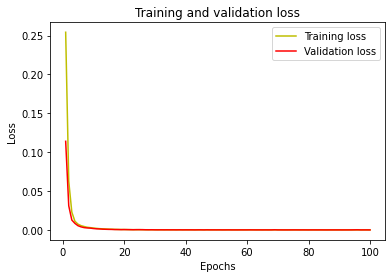

In [17]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
hist = model.predict(scaled_test_train)
print(hist)

[[ 0.09857728 -0.38950962]
 [ 0.6912555  -0.9443217 ]
 [ 0.996178   -1.0078484 ]
 [ 0.55684006 -0.91379553]
 [-0.6103964   0.6310441 ]
 [ 0.7820492  -0.96589917]
 [-0.22682704 -0.23201853]
 [-0.7938193   0.6176598 ]
 [-0.23931764 -0.16385202]
 [-0.2526459  -0.16067319]
 [ 0.72529596 -0.94129723]
 [ 0.2470275  -0.45575294]
 [ 0.21613763 -0.63982785]
 [-0.31317365  0.04958699]
 [-0.18436219 -0.2936967 ]
 [ 0.88799876 -0.92455   ]
 [ 0.76240265 -0.96703154]
 [ 0.6349581  -0.76153207]
 [-0.88188875  0.80660576]
 [ 0.19352491 -0.648253  ]
 [ 0.9268591  -0.9657795 ]
 [ 0.6807514  -0.9466362 ]
 [ 0.45643902 -0.68561643]
 [-0.9726297   0.99440044]
 [-0.7041161   0.5295261 ]
 [ 0.96909827 -1.0243909 ]
 [ 0.7545637  -0.9145344 ]
 [-0.69857484  0.44039044]
 [ 0.69215554 -0.76153773]
 [ 0.16197501 -0.5073755 ]
 [-0.53160346  0.3643024 ]
 [ 0.96714586 -1.0157523 ]
 [ 0.6974638  -0.91139513]
 [ 0.19253685 -0.6529879 ]
 [-0.7047854   0.44080782]
 [ 0.93436795 -0.95256513]
 [-0.5289851   0.27920097]
 

In [19]:
actual = scaler_out.inverse_transform(hist)

In [20]:
len(actual)

164

In [21]:
len(target_test)

164

In [22]:
actual_dop = []
actual_ke = []
for i in range(len(target_test)):
  actual_ke.append(target_test[i][0])
  actual_dop.append(target_test[i][1])

pred_dop = []
pred_ke = []
for i in range(len(actual)):
  pred_ke.append(actual[i][0])
  pred_dop.append(actual[i][1])

In [23]:
x = []
for i in range(164):
  x.append(i*2)

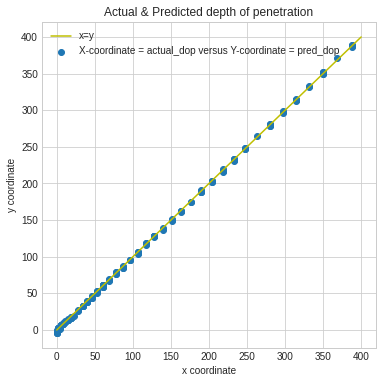

In [69]:
plt.figure(figsize=(6,6))
plt.scatter(actual_dop, pred_dop, label='X-coordinate = actual_dop versus Y-coordinate = pred_dop')
plt.plot(x, x, 'y', label = "x=y")
plt.title('Actual & Predicted depth of penetration')
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')
plt.legend()
plt.show()

In [28]:
y = []
for i in range(164):
  y.append(-i//2)

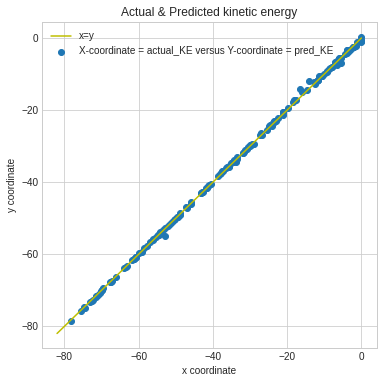

In [72]:
plt.figure(figsize=(6,6))
plt.scatter(actual_ke, pred_ke, label='X-coordinate = actual_KE versus Y-coordinate = pred_KE')
plt.plot(y, y, 'y', label = "x=y")
plt.title('Actual & Predicted kinetic energy')
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')
plt.legend()
plt.show()

In [35]:
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm

In [36]:
mean_absolute_error(actual_ke, pred_ke)

0.28957131161544375

In [37]:
mean_absolute_error(actual_dop, pred_dop)

1.10275888351458

<bound method Figure.show of <Figure size 432x288 with 1 Axes>>

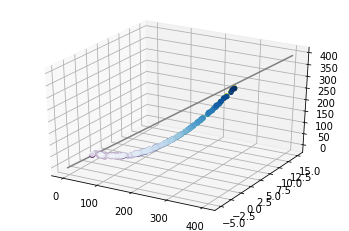

In [62]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(min(actual_dop)-5, max(actual_dop)+5, 100)
xline = np.linspace(-5, 400+5, 100)
yline = np.linspace(-5, 10+5, 100)
ax.plot3D(xline, yline, zline, 'gray')

ax.scatter3D(input_test_vel, input_test_thickness, actual_dop,c=actual_dop, cmap='Blues')
ax.scatter3D(input_test_vel, input_test_thickness, pred_dop, c=pred_dop, cmap='viridis')
fig.show

ValueError: ignored

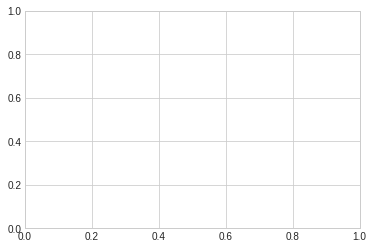

In [64]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
x = np.linspace(0, 400, 5)

plt.plot(x, input_test_vel, 'o', color='black');